In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import collections
from collections import defaultdict

In [2]:
matches=pd.read_csv("Ipl Data/matches.csv")
matches.tail(20)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
736,11332,2019,Chennai,23/04/19,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,SR Watson,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Vineet Kulkarni
737,11333,2019,Bengaluru,24/04/19,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,17,0,AB de Villiers,M. Chinnaswamy Stadium,Bruce Oxenford,C Shamshuddin,Rod Tucker
738,11334,2019,Kolkata,25/04/19,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,VR Aaron,Eden Gardens,Ian Gould,Anil Dandekar,Nitin Menon
739,11335,2019,Chennai,26/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,46,0,RG Sharma,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Vineet Kulkarni
740,11336,2019,Jaipur,27/04/19,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,JD Unadkat,Sawai Mansingh Stadium,Yeshwant Barde,Nand Kishore,Sundaram Ravi
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan,Nanda Kishore
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould


Viewing each columns value count to check for duplicate value with typo and missing or Nan values.

In [3]:
season_count = matches['season'].value_counts(dropna = False)
season_count

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [4]:
city_count = matches['city'].value_counts(dropna = False)
city_count

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
NaN                 7
Port Elizabeth      7
Abu Dhabi           7
Cape Town           7
Ranchi              7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [5]:
date_count = matches['date'].value_counts(dropna = False)
date_count

2013-05-09    2
2009-05-14    2
22/04/18      2
2011-04-27    2
2015-05-01    2
             ..
2014-04-17    1
2010-03-30    1
2009-04-22    1
2016-05-11    1
2010-04-19    1
Name: date, Length: 546, dtype: int64

In [6]:
team1_count = matches['team1'].value_counts(dropna = False)
team1_count

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

As you can see, few teams are identical with each other, so need to merge them into one value.

In [7]:
toss_decision_count = matches['toss_decision'].value_counts(dropna = False)
toss_decision_count

field    463
bat      293
Name: toss_decision, dtype: int64

In [8]:
result_count = matches['result'].value_counts(dropna = False)
result_count

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [9]:
dl_applied_count = matches['dl_applied'].value_counts(dropna = False)
dl_applied_count

0    737
1     19
Name: dl_applied, dtype: int64

In [10]:
winner_count = matches['winner'].value_counts(dropna = False)
winner_count

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
NaN                              4
Name: winner, dtype: int64

You can see that there are 4 Nan values which is in correspondence with matches with no result(tied or dismissed).

In [11]:
win_runs_count = matches['win_by_runs'].value_counts(dropna = False)
win_runs_count

0      419
14      13
4       11
10      11
1       10
      ... 
64       1
66       1
67       1
72       1
146      1
Name: win_by_runs, Length: 89, dtype: int64

In [12]:
win_wickets_count = matches['win_by_wickets'].value_counts(dropna = False)
win_wickets_count

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

In [13]:
venue_count = matches['venue'].value_counts(dropna = False)
venue_count

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

Similar to teams column,venue column also have identical value with different names.

In [14]:
#Data Cleaning
#Replacing duplicate team name
matches=matches.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
matches=matches.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
matches=matches.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad") 

#Filling Null values in winner column
matches['winner'] = matches['winner'].fillna("No Result")

#Merging similar name of stadiums into one
matches=matches.replace(to_replace ="MA Chidambaram Stadium, Chepauk", value ="M. A. Chidambaram Stadium") 
matches=matches.replace(to_replace ="Punjab Cricket Association IS Bindra Stadium, Mohali", value ="Punjab Cricket Association Stadium, Mohali") 
matches=matches.replace(to_replace ="M. Chinnaswamy Stadium", value ="M Chinnaswamy Stadium") 
matches=matches.replace(to_replace ="ACA-VDCA Stadium", value ="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium") 
matches=matches.replace(to_replace ="Rajiv Gandhi International Stadium, Uppal", value ="Rajiv Gandhi Intl. Cricket Stadium") 


/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


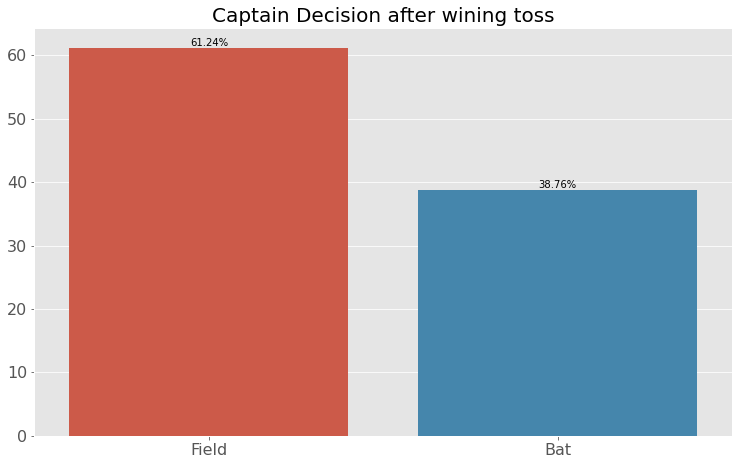

In [15]:
toss_won_and_field=len(matches['toss_winner'][matches['toss_decision']=='field'])
toss_won_and_bat=len(matches['toss_winner'][matches['toss_decision']=='bat'])
labels=["Field","Bat"]
total=toss_won_and_bat+toss_won_and_field
result=[(toss_won_and_field/total)*100,(toss_won_and_bat/total)*100]
fig=plt.gcf()
plt.style.use('ggplot')
fig.set_size_inches(12.5,7.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Captain Decision after wining toss",fontsize=20)
ax=sns.barplot(labels,result)
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,str(round(result[count],2))+"%",ha="center") 
    count+=1

/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Teams won Batting First Vs Fielding First'}>

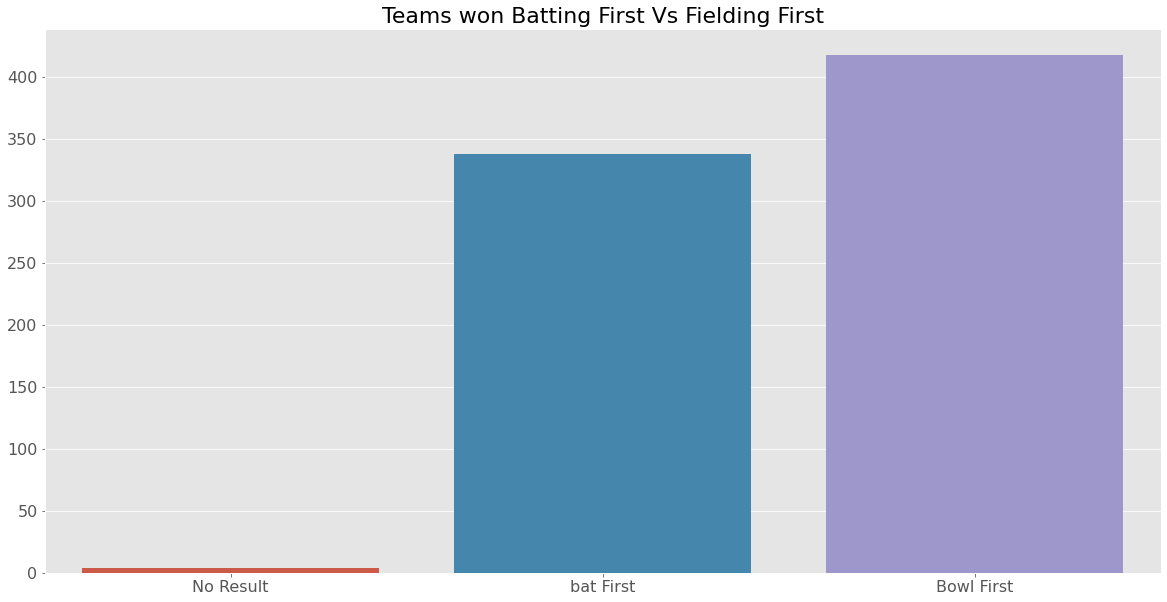

In [16]:
#Analysis of teams won batting first Vs Fielding first
team=list(matches.team1.unique())
bat_first=0
bowl_first=0
draw=0
for i in range(len(matches)):
    if matches['team1'].iloc[i] in team or matches['team2'].iloc[i] in team:
        t1=matches['team1'].iloc[i]
        t2=matches['team2'].iloc[i]
        if matches.toss_winner.iloc[i]==t1 and matches.toss_decision.iloc[i]=='field':
            if matches.winner.iloc[i]=="No Result":
                draw+=1
            if matches.winner.iloc[i]==t1:
                bowl_first+=1
            else:
                bat_first+=1
        elif matches.toss_winner.iloc[i]==t1 and matches.toss_decision.iloc[i]=='bat':
            if matches.winner.iloc[i]=="No Result":
                draw+=1
            if matches.winner.iloc[i]==t1:
                bat_first+=1
            else:
                bowl_first+=1
        elif matches.toss_winner.iloc[i]==t2 and matches.toss_decision.iloc[i]=='field':
            if matches.winner.iloc[i]=="No Result":
                draw+=1
            if matches.winner.iloc[i]==t2:
                bowl_first+=1
            else:
                bat_first+=1  
        elif matches.toss_winner.iloc[i]==t2 and matches.toss_decision.iloc[i]=='bat':
            if matches.winner.iloc[i]=="No Result":
                draw+=1
            if matches.winner.iloc[i]==t2:
                bat_first+=1
            else:
                bowl_first+=1  
labels=["No Result",'bat First',"Bowl First"]
result=[draw,bat_first,bowl_first]
fig=plt.gcf()
plt.style.use('ggplot')
fig.set_size_inches(20,10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Teams won Batting First Vs Fielding First",fontsize=22)
sns.barplot(labels,result)

/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


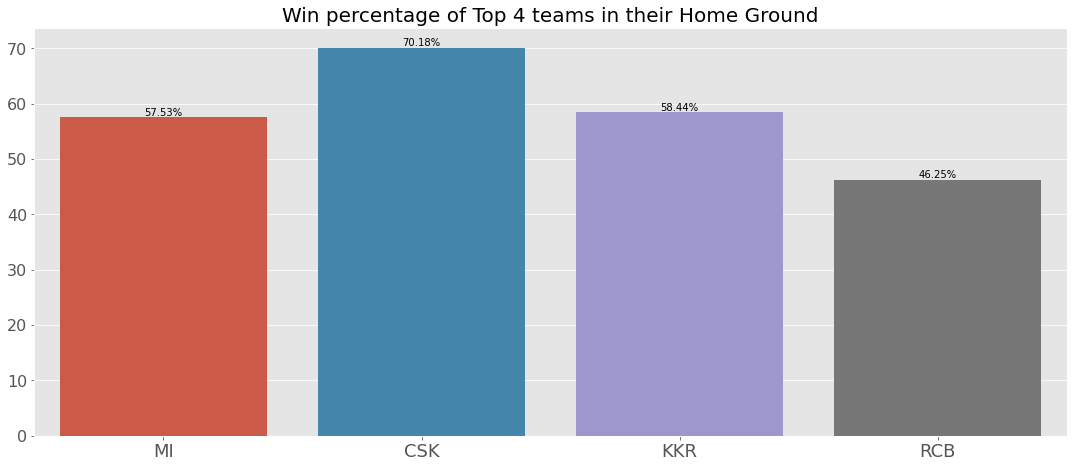

In [17]:
mi_ground=["Wankhede Stadium"]
csk_ground=["M. A. Chidambaram Stadium","MA Chidambaram Stadium, Chepauk"]
kkr_ground=["Eden Gardens"]
rcb_ground=["M Chinnaswamy Stadium","M. Chinnaswamy Stadium"]

#calcualting win percentage in their home grounds
mi,csk,rcb,kkr=0,0,0,0
mi_total,csk_total,kkr_total,rcb_total=0,0,0,0
for i in range(len(matches)):
    if matches.season.iloc[i]>=2007:
        if matches.venue.iloc[i] in mi_ground:
            mi_total+=1
            if matches.winner.iloc[i]=='Mumbai Indians':
                mi+=1
        elif matches.venue.iloc[i] in csk_ground:
            csk_total+=1
            if matches.winner.iloc[i]=='Chennai Super Kings':
                csk+=1
        elif matches.venue.iloc[i] in rcb_ground:
            rcb_total+=1
            if matches.winner.iloc[i]=='Royal Challengers Bangalore':
                rcb+=1
        elif matches.venue.iloc[i] in kkr_ground: 
            kkr_total+=1
            if matches.winner.iloc[i]=='Kolkata Knight Riders':
                kkr+=1
#print(mi,csk,kkr,rcb)
#print(mi_total,csk_total,kkr_total,rcb_total)
team=["MI","CSK","KKR","RCB"]
result=[mi/mi_total,csk/csk_total,kkr/kkr_total,rcb/rcb_total]
for i in range(0,len(result)):
    result[i]*=100

fig=plt.gcf()
plt.style.use('ggplot')
fig.set_size_inches(18.5,7.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("Win percentage of Top 4 teams in their Home Ground",fontsize=20)
ax=sns.barplot(team,result)
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,str(round(result[count],2))+"%",ha="center") 
    count+=1

/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


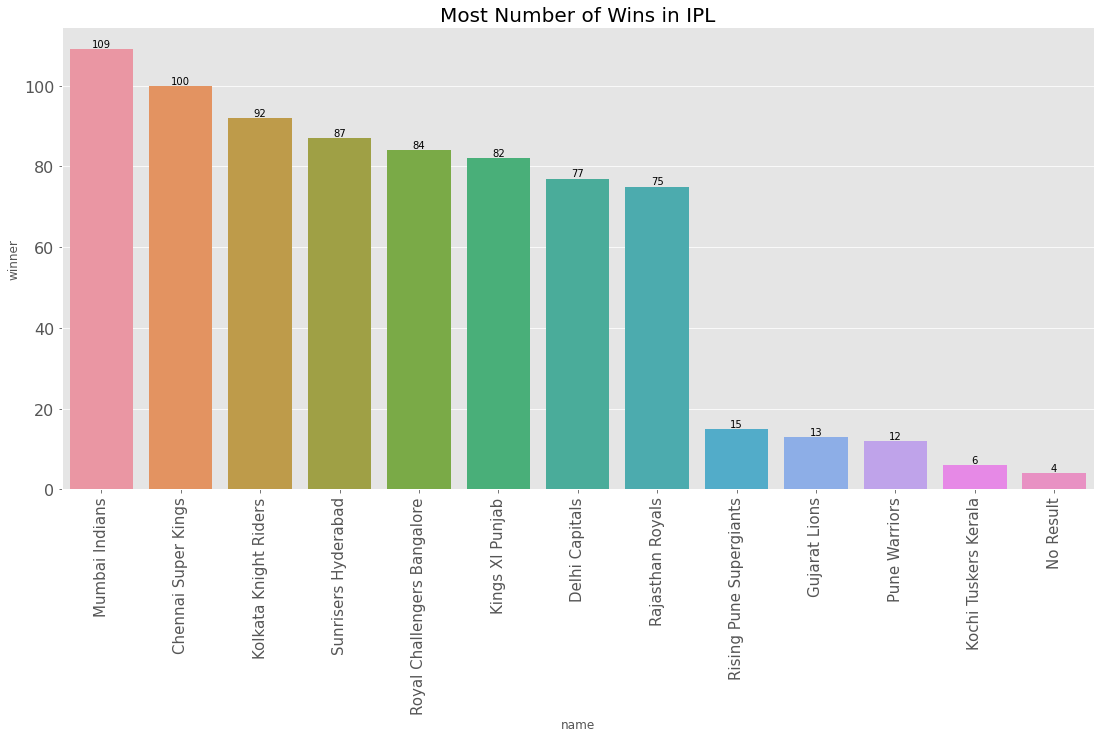

In [18]:
#Team with most wins
wins=pd.DataFrame(matches['winner'].value_counts(),index=None)
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,8.5)
#wins=pd.DataFrame(matches['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=16)
plt.title("Most Number of Wins in IPL",fontsize=20)
ax=sns.barplot(wins['name'],wins['winner'])
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.5,wins['winner'].iloc[count],ha="center") 
    count+=1

/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


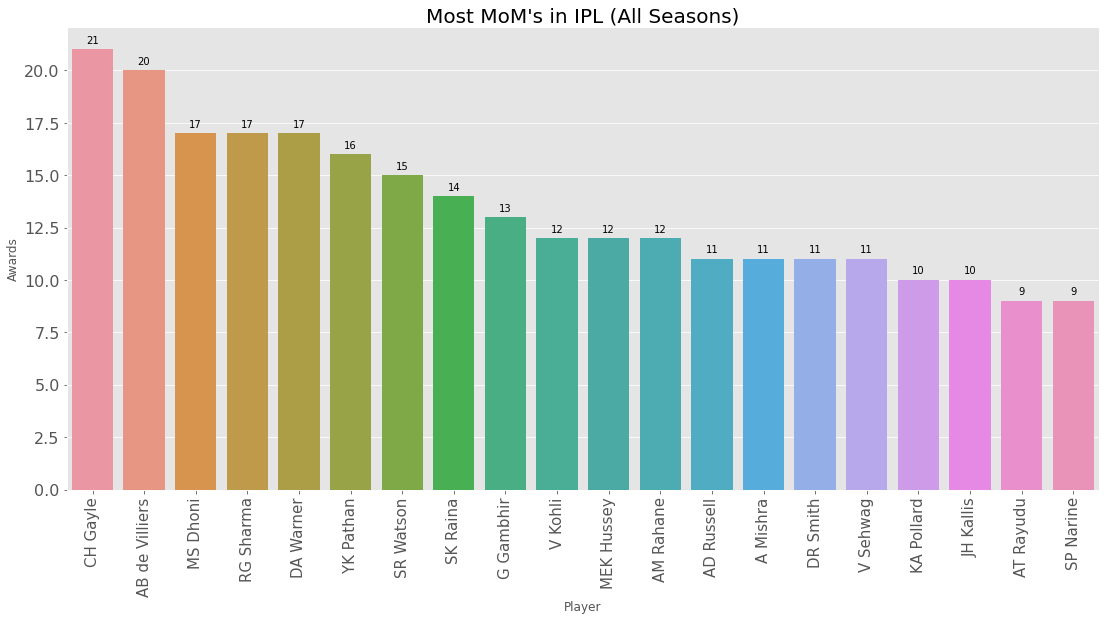

In [19]:
#With most mom awards in IPL
mom = pd.DataFrame()
mom['Awards']=matches['player_of_match'].value_counts()
mom['Player'] =mom.index
mom=mom[:20]
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,8.5)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=16)
plt.title("Most MoM's in IPL (All Seasons)",fontsize=20)
ax=sns.barplot(mom['Player'],mom['Awards'])
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,mom['Awards'].iloc[count],ha="center") 
    count+=1

/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


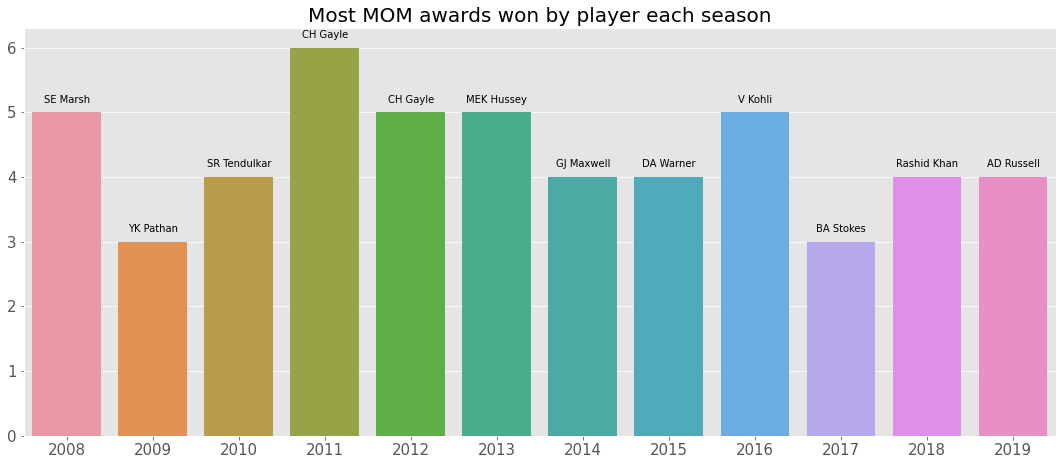

In [20]:

dic=defaultdict(list)
for i in range(0,len(matches)):
    #if matches.season.iloc[i] not in dic.keys():
    dic[matches.season.iloc[i]].append(matches.player_of_match.iloc[i])
player=[]
match=[]
year=[]
for i in sorted(dic.keys()):
    ctr=collections.Counter(dic[i])
    d={k: v for k, v in sorted(ctr.items(), key=lambda item: item[1],reverse=True)}
    player.append(list(d.keys())[0])
    match.append(list(d.values())[0])
    year.append(i)
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Most MOM awards won by player each season",fontsize=20)
ax=sns.barplot(year,match)
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.15,player[count],ha="center") 
    count+=1

/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


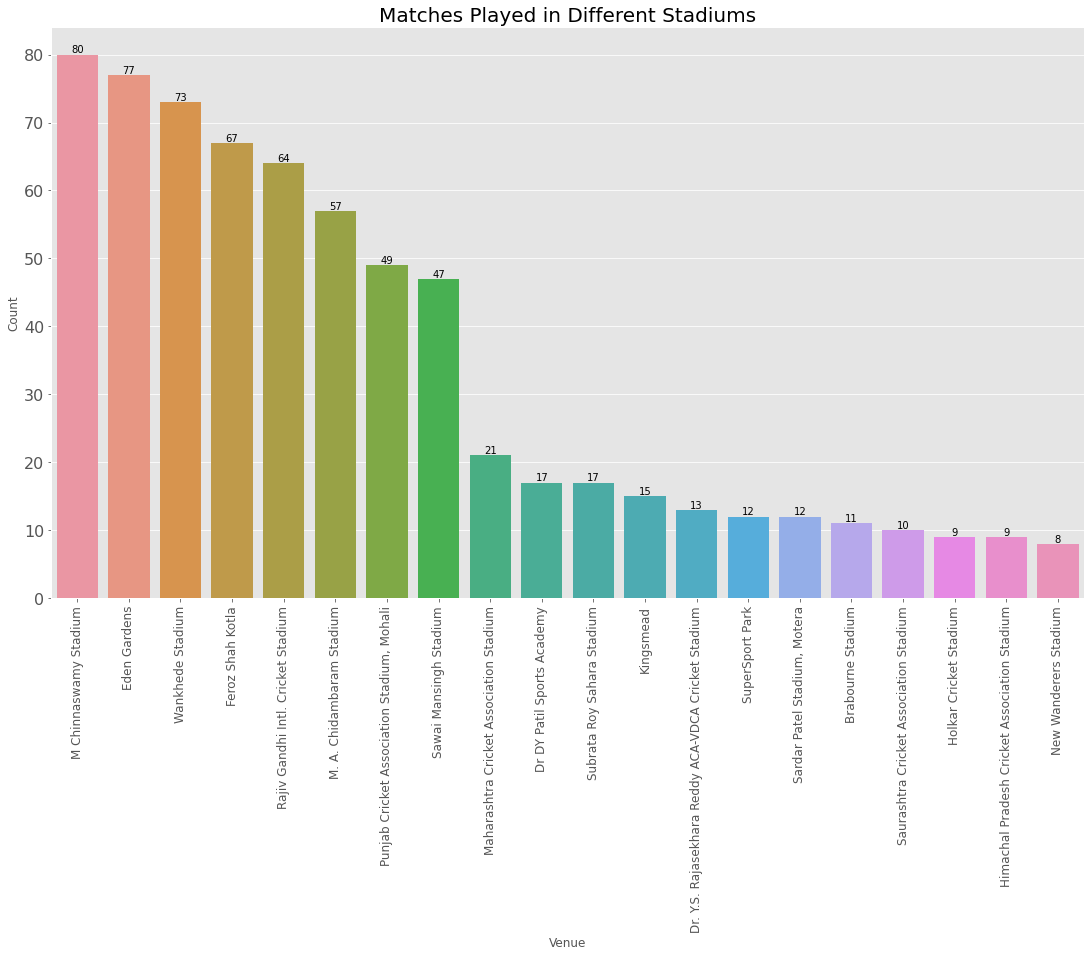

In [21]:
mom = pd.DataFrame()
mom['Count']=matches['venue'].value_counts()
mom['Venue'] =mom.index
mom=mom[:20]
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.title("Matches Played in Different Stadiums",fontsize=20)
ax=sns.barplot(mom['Venue'],mom['Count'])
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,mom['Count'].iloc[count],ha="center") 
    count+=1

/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


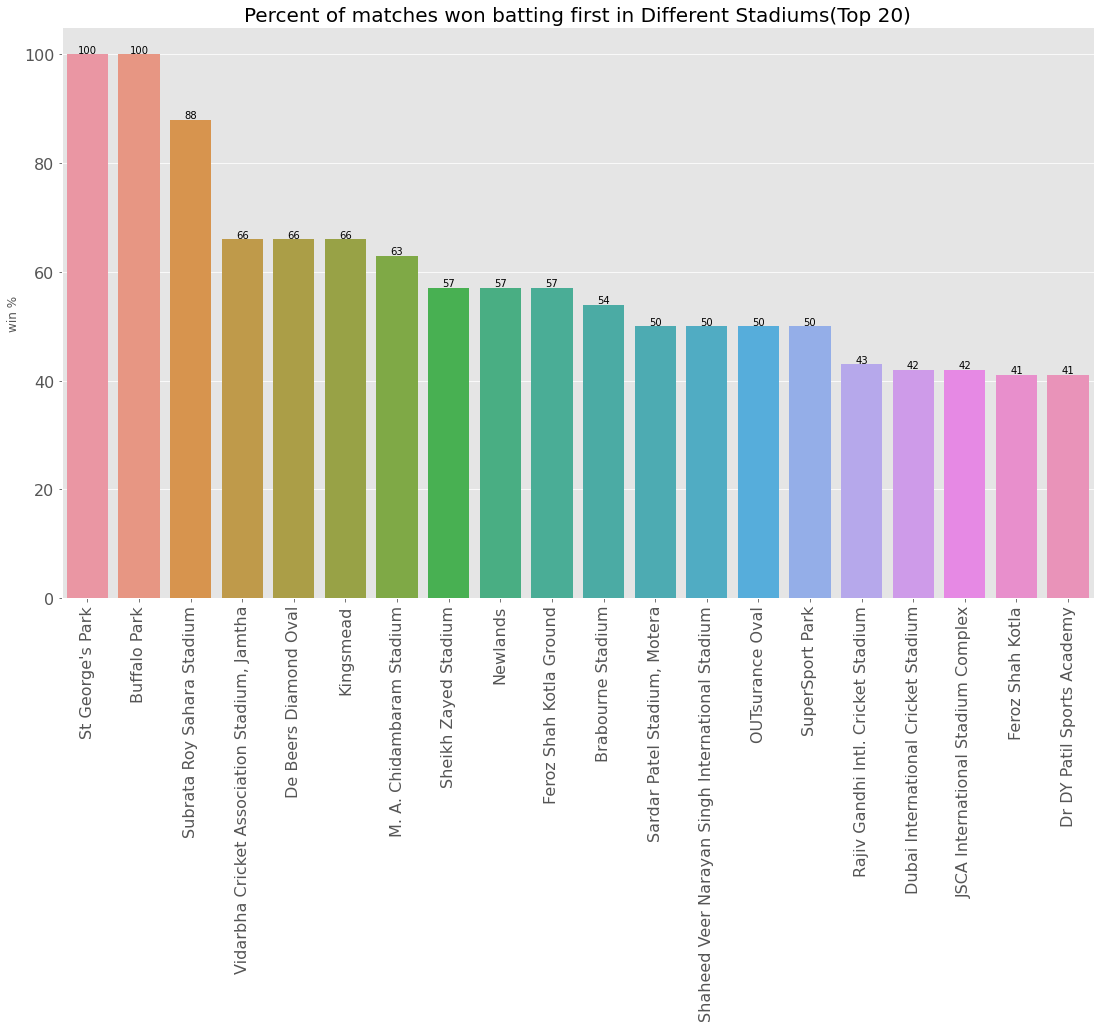

In [22]:
df = pd.DataFrame()
df1 = pd.DataFrame()
df['matches_won_batting_first'] = matches['toss_winner'][matches['toss_decision']=='bat']
indexes = df.index
df['venue'] = matches[matches.index.isin(indexes)]['venue']
df1['venue'] = matches['venue'].value_counts()
df1['win_count'] = df['venue'].value_counts()
df1['win %'] = 100 * df1['win_count']/df1['venue'] 
df1 = df1.sort_values(by = ['win %'],ascending = False)
df1 = df1[:20]
df1['win %'] = df1['win %'].astype('int')
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Percent of matches won batting first in Different Stadiums(Top 20)",fontsize=20)
ax=sns.barplot(df1.index,df1['win %'])
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,df1['win %'].iloc[count],ha="center") 
    count+=1

/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


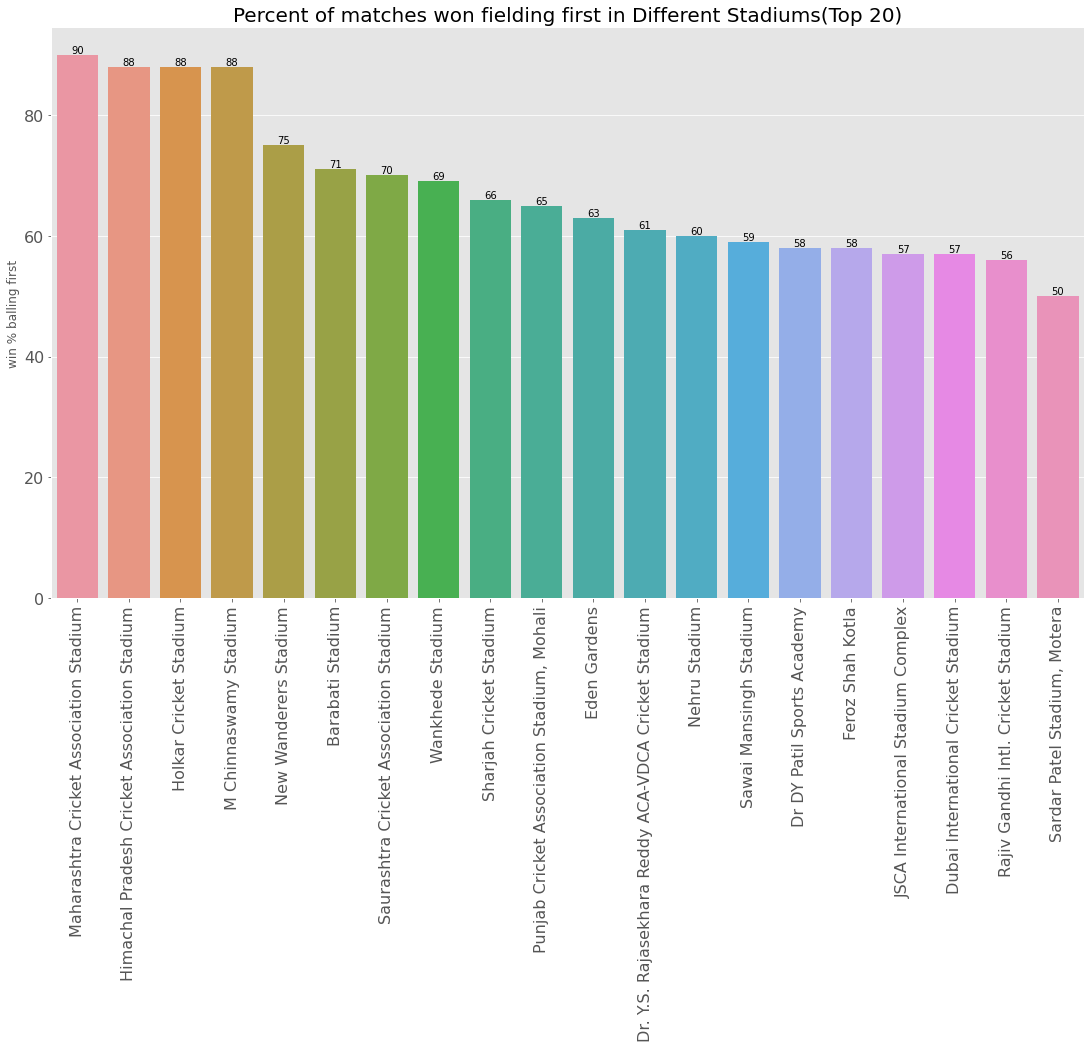

In [23]:
df = pd.DataFrame()
df1 = pd.DataFrame()
df['matches_won_batting_first'] = matches['toss_winner'][matches['toss_decision']=='bat']
indexes = df.index
df['venue'] = matches[matches.index.isin(indexes)]['venue']
df1['venue'] = matches['venue'].value_counts()
df1['win_count'] = df['venue'].value_counts()
df1['win %'] = 100 * df1['win_count']/df1['venue'] 
df1 = df1.sort_values(by = ['win %'])
df1['win % balling first'] = 100 - df1['win %']
df1 = df1[:20]
df1['win % balling first'] = df1['win % balling first'].astype('int')
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Percent of matches won fielding first in Different Stadiums(Top 20)",fontsize=20)
ax=sns.barplot(df1.index,df1['win % balling first'])
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,df1['win % balling first'].iloc[count],ha="center") 
    count+=1


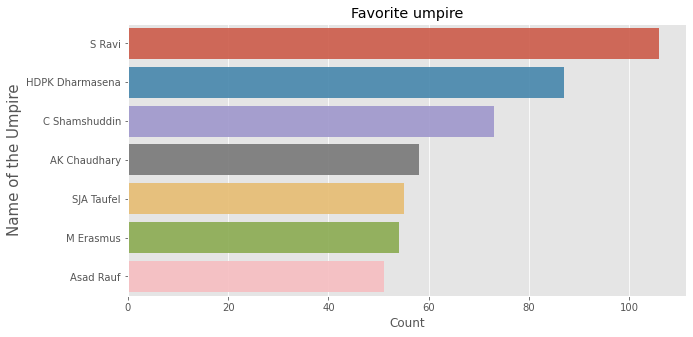

In [24]:
ump=pd.concat([matches['umpire1'],matches['umpire2']]).value_counts().sort_values(ascending=False)
ump=ump[:7]
plt.figure(figsize=(10,5))
Most_umpired =sns.barplot(y=ump.index, x=ump.values, alpha=0.9)

plt.title('Favorite umpire')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Name of the Umpire', fontsize=15)
plt.show()

# Stadium Wise Analysis


## Feroz Shah Kotla

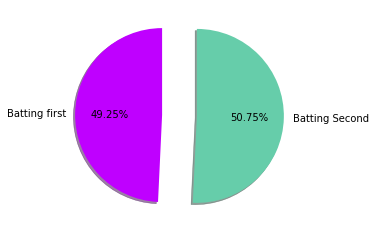

In [26]:
Delhi_stadium=matches.loc[(matches['venue']=='Feroz Shah Kotla') ]
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])
plt.show()

 Batting Second is Slightly Preferrable on Feroz Shah Kotla

## Eden Gardens

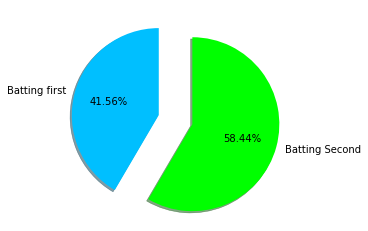

In [27]:
Kolkata_stadium=matches.loc[(matches['venue']=='Eden Gardens') ]
Kolkata_stadium_win_by_runs=Kolkata_stadium[Kolkata_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Kolkata_stadium_win_by_runs),len(Kolkata_stadium)-len(Kolkata_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()


Batting Second on Eden Gardens is Clearly Favourable

## Wankhede Stadium

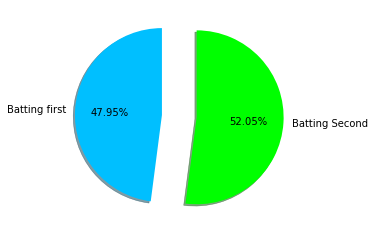

In [28]:
Mumbai_stadium=matches.loc[(matches['venue']=='Wankhede Stadium') ]
Mumbai_stadium_win_by_runs=Mumbai_stadium[Mumbai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Mumbai_stadium_win_by_runs),len(Mumbai_stadium)-len(Mumbai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()

Almost same for both the cases

## M Chinnaswamy Stadium

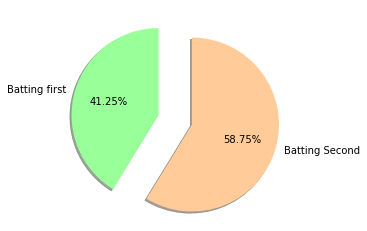

In [30]:
M_Chinnaswamy_Stadium=matches.loc[(matches['venue']=='M Chinnaswamy Stadium') ]
M_Chinnaswamy_Stadium_win_by_runs=M_Chinnaswamy_Stadium[M_Chinnaswamy_Stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(M_Chinnaswamy_Stadium_win_by_runs),len(M_Chinnaswamy_Stadium)-len(M_Chinnaswamy_Stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

Batting Second on M Chinnaswamy Stadium is Clearly Favourable